In [1]:
! pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 54kB/s 


In [2]:
! pip install keras

In [3]:
! pip install pandas

In [4]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TF version: 2.3.1
Hub version: 0.9.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [5]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob


In [6]:
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import os
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [8]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [9]:
df=pd.DataFrame(iris['data'],columns=iris['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
df['flower_id']=iris['target']

In [11]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_id
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [17]:
df['flower_name']=df['flower_id'].apply(lambda x: iris['target_names'][x])

In [18]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_id,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [19]:
df.shape

(150, 6)

In [20]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'flower_id', 'flower_name'],
      dtype='object')

In [22]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
flower_id            0
flower_name          0
dtype: int64

In [23]:
df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
flower_id             3
flower_name           3
dtype: int64

In [24]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
flower_id              int64
flower_name           object
dtype: object

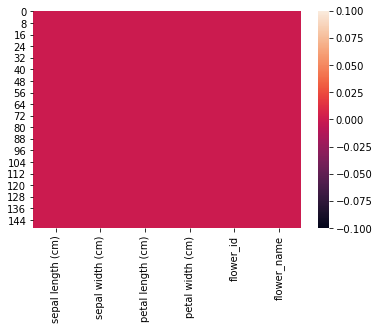

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.heatmap(df.isnull())

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [26]:
X = df.drop(['flower_id','flower_name'],axis='columns')
y = df['flower_id']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [28]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

In [29]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test) 

In [30]:

X_train.shape

(105, 4)

In [31]:
X_test.shape

(45, 4)

In [34]:
X_train

array([[-0.78847931,  2.2916743 , -1.25456793, -1.40976967],
       [ 1.29661042,  0.0322771 ,  0.66355092,  0.41288769],
       [ 0.07008705,  0.25821682,  0.60713566,  0.80345712],
       [-0.29786996, -0.64554206,  0.66355092,  1.06383675],
       [ 1.05130574,  0.48415654,  1.114873  ,  1.7147858 ],
       [ 0.43804406, -2.00118037,  0.43788988,  0.41288769],
       [ 1.66456743,  1.1619757 ,  1.34053404,  1.7147858 ],
       [-0.4205223 , -1.54930093, -0.0134322 , -0.23806137],
       [ 0.19273939, -0.41960234,  0.43788988,  0.41288769],
       [ 0.68334873,  0.25821682,  0.43788988,  0.41288769],
       [-0.05256529,  2.06573458, -1.42381371, -1.27957986],
       [-0.66582697,  1.38791542, -1.25456793, -1.27957986],
       [ 0.31539172, -0.41960234,  0.5507204 ,  0.28269788],
       [-0.54317463,  0.71009626, -1.14173741, -1.27957986],
       [ 0.68334873,  0.0322771 ,  1.00204248,  0.80345712],
       [-1.40174099,  0.25821682, -1.19815267, -1.27957986],
       [-1.52439333,  0.

In [35]:
y_train.shape

(105, 3)

In [36]:
model = Sequential([
    Dense(8, input_shape=(4,), activation='relu'),
    Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

r=model.fit(X_train, y_train, epochs=500,validation_data=(X_test,y_test))

Epoch 1/500
4/4 [==============================] - 0s 49ms/step - loss: 1.8485 - accuracy: 0.1619 - val_loss: 1.6805 - val_accuracy: 0.2889
Epoch 2/500
4/4 [==============================] - 0s 8ms/step - loss: 1.8063 - accuracy: 0.1619 - val_loss: 1.6449 - val_accuracy: 0.2889
Epoch 3/500
4/4 [==============================] - 0s 7ms/step - loss: 1.7662 - accuracy: 0.1619 - val_loss: 1.6109 - val_accuracy: 0.2889
Epoch 4/500
4/4 [==============================] - 0s 8ms/step - loss: 1.7275 - accuracy: 0.1619 - val_loss: 1.5782 - val_accuracy: 0.2889
Epoch 5/500
4/4 [==============================] - 0s 8ms/step - loss: 1.6911 - accuracy: 0.1619 - val_loss: 1.5464 - val_accuracy: 0.2889
Epoch 6/500
4/4 [==============================] - 0s 8ms/step - loss: 1.6537 - accuracy: 0.1619 - val_loss: 1.5162 - val_accuracy: 0.2889
Epoch 7/500
4/4 [==============================] - 0s 9ms/step - loss: 1.6202 - accuracy: 0.1714 - val_loss: 1.4868 - val_accuracy: 0.2889
Epoch 8/500
4/4 [=========

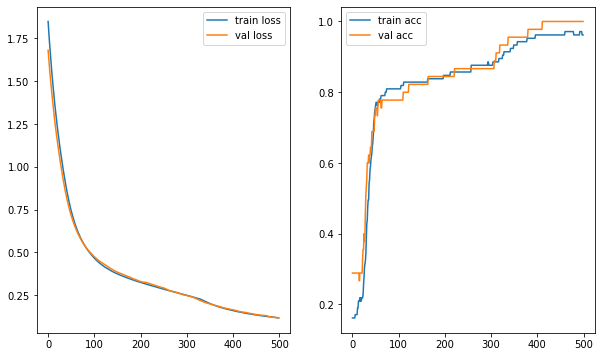

In [38]:
# plot the loss
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.subplot(1,2,2)
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('AccVal_acc')

In [39]:
k=r.history['val_accuracy']
print('The Validation Accuracy of ANN Model: ', np.mean(k))

The Validation Accuracy of ANN Model:  0.8474666740298271


In [40]:
yp= model.predict(X_test)
yp

array([[5.55601146e-04, 9.03633416e-01, 9.58109424e-02],
       [1.73040418e-04, 1.14203796e-01, 8.85623097e-01],
       [9.97719467e-01, 2.05828622e-03, 2.22205446e-04],
       [1.36442482e-02, 7.84166515e-01, 2.02189237e-01],
       [9.96374667e-01, 3.45900725e-03, 1.66342419e-04],
       [1.20102696e-03, 9.82497394e-01, 1.63016319e-02],
       [6.04945933e-04, 5.96828580e-01, 4.02566463e-01],
       [1.45349056e-02, 9.65791941e-01, 1.96732208e-02],
       [9.96848643e-01, 2.97194161e-03, 1.79415438e-04],
       [6.96385233e-03, 8.31486404e-01, 1.61549687e-01],
       [1.35359187e-02, 6.62579060e-01, 3.23885024e-01],
       [2.20972332e-04, 1.06031224e-01, 8.93747807e-01],
       [1.08281779e-03, 9.17128623e-01, 8.17884952e-02],
       [9.86414611e-01, 1.33589478e-02, 2.26447868e-04],
       [9.98428881e-01, 1.18483219e-03, 3.86280619e-04],
       [1.88879567e-04, 4.94740158e-02, 9.50337052e-01],
       [4.49975841e-02, 6.30484462e-01, 3.24517965e-01],
       [9.93439496e-01, 6.28751

In [41]:
y_pred_labels=np.argmax(yp,axis=1)
y_pred_labels

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1])

In [42]:
y_pred_count=np.unique(y_pred_labels, return_counts=True)
y_pred_count

(array([0, 1, 2]), array([14, 17, 14]))

In [43]:
y_real_labels=np.argmax(y_test,axis=1)
y_real_labels

y_real_count=np.unique(y_real_labels, return_counts=True)
y_real_count

(array([0, 1, 2]), array([14, 17, 14]))

In [44]:
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(y_real_labels, y_pred_labels)
c_m

array([[14,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 14]])

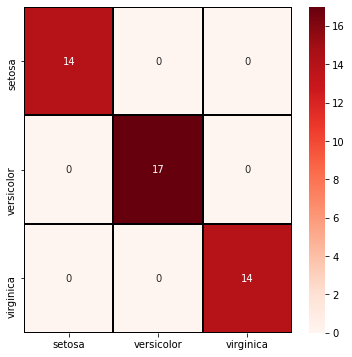

In [50]:
labels=['setosa', 'versicolor', 'virginica']
import seaborn as sns
plt.figure(figsize = (6,6))
sns.heatmap(c_m,cmap= "Reds", linecolor = 'black' , linewidth = 1 , annot = True, fmt='', xticklabels=labels, yticklabels=labels)

In [52]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_real_labels,y_pred_labels))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

